# Monoscale Texto

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import os

# from gmm_ot import *
from patch import *
from gaussian_texture import *
import semidiscrete_ot as sdot

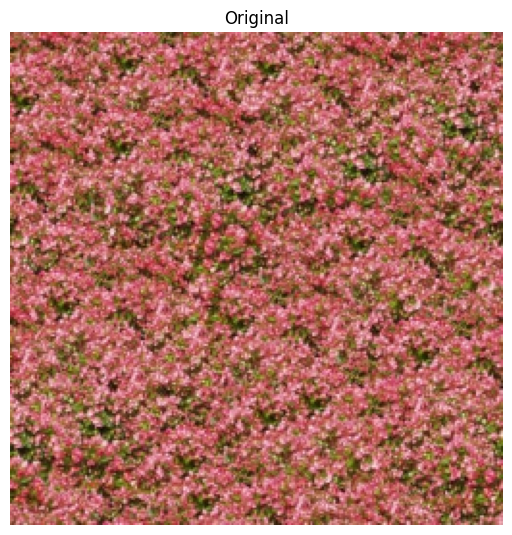

In [5]:
# Load input image
path = os.path.join('..', '..','images', 'flower_beds_256', 'FlowerBeds0001_1_256.jpg')

im0 = np.double(plt.imread(path))
m,n,nc=im0.shape

# Display
dpi = 40
plt.figure(figsize=(m/float(dpi),n/float(dpi)))
# Original
plt.imshow(im0.astype('uint8'))
plt.title('Original')
plt.axis('off');

In [5]:
# Parameters
w = 3        # patch size
s = 1        # stride
ngmm = 4     # number of GMs
nscales = 1  # number of scales
niter = 100000  # nb of iterations in ASGD
C = 1        # gradient step in ASGD

fac = 1

In [3]:
#for scale in range(nscales-1,nscales-2,-1):
scale=nscales-1
rf = 2**scale
im0nor = fac*im0

(t,mv) = estimate_adsn_model(im0nor)
mv = np.reshape(mv,(1,1,3))*np.ones((m,n,nc))
synthbt = adsn(t,mv)

P = patch(m,n,nc,w,s)
    
# Display
dpi = 40
plt.figure(figsize=(m/float(dpi),n/float(dpi)))
# Original
plt.imshow((synthbt/fac).astype('uint8'))
plt.title('Gaussian')
plt.axis('off');


NameError: name 'im0' is not defined

In [5]:
# Source measure
P0 = P.im2patch(im0nor)
meanp = np.mean(P0,0)
covp = np.cov(P0.T)
sample = lambda : np.random.multivariate_normal(meanp,covp)

In [6]:
# Target measure
P0 = P.im2patch(im0nor)
ntarget = min(P.Np,1000)
rperm = np.random.permutation(P.Np)
y = P0[rperm[0:ntarget],:]
nu = np.ones(ntarget)/ntarget

In [7]:
# Compute semi-discrete optimal transport
v = sdot.asgd(sample,y,nu,niter,C)

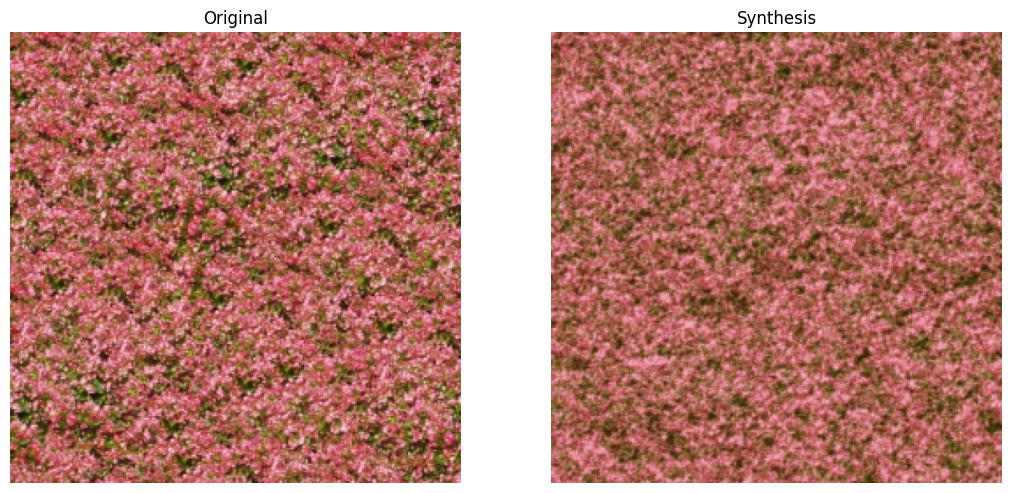

In [8]:
Pbt = P.im2patch(synthbt)
Psynthsc,ind = sdot.map(Pbt,y,v)
synth = P.patch2im(Psynthsc)

# Display
dpi = 20
plt.figure(figsize=(m/float(dpi),n/float(dpi)))
# Original
plt.subplot(121)
plt.imshow((im0nor/fac).astype('uint8'))
plt.title('Original')
plt.axis('off');
plt.subplot(122)
plt.imshow((synth/fac).astype('uint8'))
plt.title('Synthesis')
plt.axis('off');

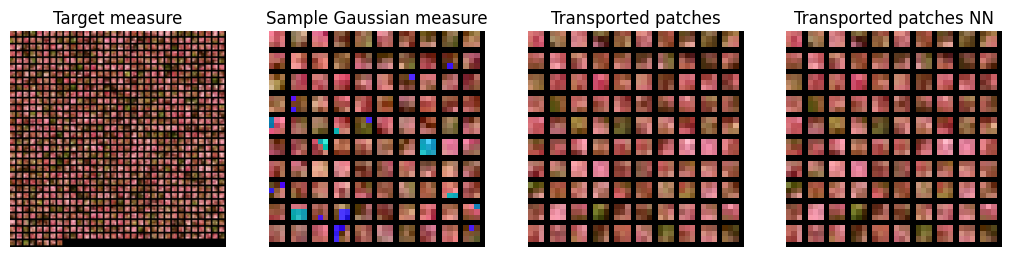

In [9]:
# Visualize quality of transport:    
def viz_patches(y):
    # View a sequence of patches as an RGB image
    margin = 1
    nps = int(np.ceil(np.sqrt(y.shape[0])))
    w = int(np.sqrt(y.shape[1]/3))
    u = np.ones(((w+margin)*nps,(w+margin)*nps,3))
    count = 0
    for i in range(nps):
        for j in range(nps):
            u[(w+margin)*i:(w+margin)*i+w,(w+margin)*j:(w+margin)*j+w,:] = np.reshape(y[count,:],(w,w,3))
            count += 1
            if count>=y.shape[0]:
                return(u)

sptest = np.zeros((100,27))
for k in range(100):
    sptest[k,:] = sample()

trsptest, ind = sdot.map(sptest,y,v)
trsptestinit, ind = sdot.map(sptest,y,nu)

dpi = 20
plt.figure(figsize=(m/float(dpi),n/float(dpi)))
plt.subplot(141)
vizy = viz_patches(y)
plt.imshow(vizy.astype('uint8'))
plt.title('Target measure')
plt.axis('off');
plt.subplot(142)
vizsptest = viz_patches(sptest)
plt.imshow(vizsptest.astype('uint8'))
plt.title('Sample Gaussian measure')
plt.axis('off');
plt.subplot(143)
viztrsptest = viz_patches(trsptest)
plt.imshow(viztrsptest.astype('uint8'))
plt.title('Transported patches')
plt.axis('off');
plt.subplot(144)
viztrsptest = viz_patches(trsptest)
plt.imshow(viztrsptest.astype('uint8'))
plt.title('Transported patches NN')
viztrsptestinit = viz_patches(trsptestinit)
plt.imshow(viztrsptestinit.astype('uint8'))
plt.axis('off');


In [10]:
folder_path = os.path.join('..', '..', 'images', 'test_images')
i=41
for filename in os.listdir(folder_path):
    list_of_mse = []

    file_path = os.path.join(folder_path, filename)
    im0 = np.double(plt.imread(file_path))
    m,n,nc=im0.shape
    #for scale in range(nscales-1,nscales-2,-1):
    scale=nscales-1
    rf = 2**scale
    im0nor = fac*im0

    (t,mv) = estimate_adsn_model(im0nor)
    mv = np.reshape(mv,(1,1,3))*np.ones((m,n,nc))
    synthbt = adsn(t,mv)

    P = patch(m,n,nc,w,s)
    P0 = P.im2patch(im0nor)
    meanp = np.mean(P0,0)
    covp = np.cov(P0.T)
    sample = lambda : np.random.multivariate_normal(meanp,covp)
    
    P0 = P.im2patch(im0nor)
    ntarget = min(P.Np,1000)
    rperm = np.random.permutation(P.Np)
    y = P0[rperm[0:ntarget],:]
    nu = np.ones(ntarget)/ntarget

    v = sdot.asgd(sample,y,nu,niter,C)

    Pbt = P.im2patch(synthbt)
    Psynthsc,ind = sdot.map(Pbt,y,v)
    synth = P.patch2im(Psynthsc)
    plt.imshow((synth/fac).astype('uint8'))
    plt.savefig(str(i))
    plt.close()
    i += 1

In [ ]:
np.savetxt('listo_mse.txt', list_of_mse)

In [ ]:
sum(list_of_mse)/len(list_of_mse)

2588.5733502823628